In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from plot_prop import *
from plot_projections import *
from prop_info import *
from get_segments import blade_alone, get_segments_points, get_planes
from major_axis import get_major_axis
from new_projections import *

In [2]:
propeller = pd.read_csv('propeller_data.csv')

In [3]:
#####################################################################################################
##########################            PRE-PROCESSING            #####################################
#####################################################################################################
print("Begin pre-processing")
propeller = center_prop(propeller)  # center prop: middle in (0,0,0) coordinates
propeller = align_prop(propeller)   # longest axis aligned along z-axis
propeller = center_prop(propeller)  # re-center prop: slight shift in previous function
#plot_pointcloud(propeller)
print("Aligned")

propeller_coords = propeller.drop_duplicates(subset=None, keep='first', inplace=False)  #remove multiple same points 
propeller_coords = propeller_coords.reset_index(drop=True)

vect_length                = vect_blade(propeller_coords)
dmiddle, dhighest, dlowest = d_blade(vect_length, propeller_coords)                     #d of plan ax+by+cx+d = 0
upper_blade, lower_blade   = blade_alone(propeller_coords, vect_length, dmiddle)        #points of each blades
vect_out, vect_side, hub_inner_radius = get_major_axis(propeller_coords, vect_length)   #main directions
print("End pre-processing")

Begin pre-processing
Aligned
End pre-processing


In [12]:
delta = 0.6   #propeller
nb_seg = 5  
threshold = 10

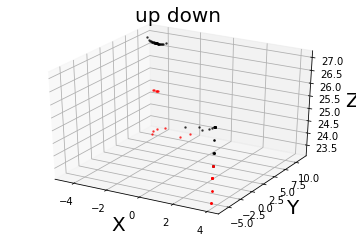

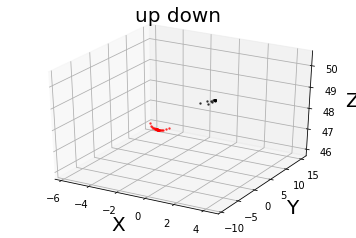

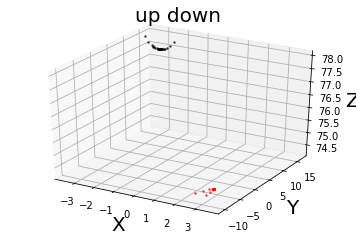

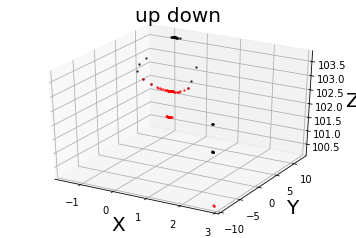

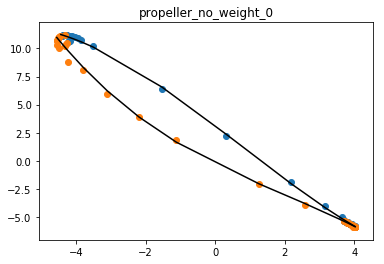

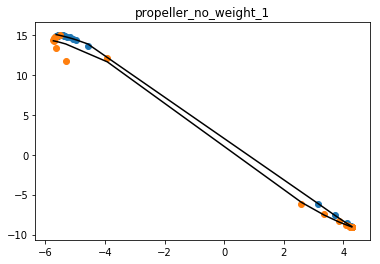

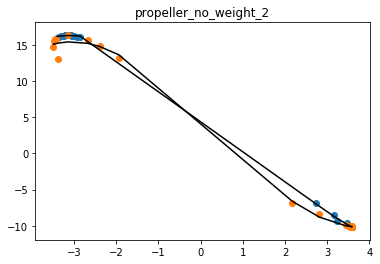

In [13]:
#####################################################################################################
############################              PROJECTIONS            ####################################
#####################################################################################################
planes = get_planes(upper_blade, dmiddle, dhighest, vect_length, nb_seg)   #get equations of planes for projection
#print(len(planes))
all_plane_points = get_points(upper_blade, planes, delta, threshold)                  #get points used for each projection

right_param, left_param, right_pts, left_pts = get_all_projections(planes, all_plane_points) #get param, points of projection

plot_interpolation_both_sides(right_param[0], right_pts[0], left_param[0], left_pts[0], "propeller_no_weight_0")
plot_interpolation_both_sides(right_param[1], right_pts[1], left_param[1], left_pts[1], "propeller_no_weight_1")
plot_interpolation_both_sides(right_param[2], right_pts[2], left_param[2], left_pts[2], "propeller_no_weight_2")
#plot_interpolation_both_sides(right_param[1], right_pts[1], left_param[1], left_pts[1], "propeller_no_weight_4")